## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [1]:
api_key = "ICFI40EIKM9PO6EG"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [2]:
ticker = "LULU"

Import the appropriate libraries in the lines below each comment:

In [6]:
# pandas
import pandas as pd
# requests
import requests as req
# alpha_vantage TimeSeries class
from alpha_vantage.timeseries import TimeSeries
# mmatplotlib.pyplot as plt
import matplotlib.pyplot as plt

#### Access API through an HTTP request

Assign the API url to the variable "link".
<br />(refer to the Alpha Vantage documention)
<br />
<br />Format the url string to include the "api_key" variable and the "ticker" variable Reassign the url u

In [15]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=1min&apikey={api_key}"
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=LULU&interval=1min&apikey=ICFI40EIKM9PO6EG


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [16]:
lulu = req.get(link)

Print the HTTP response:

In [17]:
print(lulu)

<Response [200]>


Print the data:

In [18]:
print(lulu.text)

{
    "Meta Data": {
        "1. Information": "Intraday (1min) open, high, low, close prices and volume",
        "2. Symbol": "LULU",
        "3. Last Refreshed": "2019-09-23 16:00:00",
        "4. Interval": "1min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (1min)": {
        "2019-09-23 16:00:00": {
            "1. open": "195.1800",
            "2. high": "195.3200",
            "3. low": "195.1200",
            "4. close": "195.1900",
            "5. volume": "25929"
        },
        "2019-09-23 15:59:00": {
            "1. open": "195.3150",
            "2. high": "195.3273",
            "3. low": "195.1500",
            "4. close": "195.1700",
            "5. volume": "21750"
        },
        "2019-09-23 15:58:00": {
            "1. open": "195.3200",
            "2. high": "195.3600",
            "3. low": "195.2300",
            "4. close": "195.3200",
            "5. volume": "13599"
        },
        "2019-09-23 1

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier. Assign your API key to the key argument. Use "pandas" as an output format.

In [26]:
ts = TimeSeries(key=api_key,output_format='pandas')

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [28]:
data, meta_data = ts.get_intraday(symbol=ticker ,interval='1min', outputsize='compact')

Print the data:

In [29]:
print(data, meta_data)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2019-09-23 14:21:00  194.8300  194.8750  194.7950  194.7950     1150.0
2019-09-23 14:22:00  194.7600  194.7600  194.7547  194.7547     1138.0
2019-09-23 14:23:00  194.7700  195.0900  194.7700  195.0600    48830.0
2019-09-23 14:24:00  195.0600  195.1600  195.0600  195.1384     3975.0
2019-09-23 14:25:00  195.1200  195.1800  195.0300  195.0300     3797.0
2019-09-23 14:26:00  195.0362  195.1850  195.0362  195.1273     6268.0
2019-09-23 14:27:00  195.1150  195.1550  195.0800  195.1108     4179.0
2019-09-23 14:28:00  195.1500  195.4000  195.1283  195.3479    19448.0
2019-09-23 14:29:00  195.3300  195.3300  195.2400  195.2400     4336.0
2019-09-23 14:30:00  195.2895  195.4300  195.2400  195.4260     7595.0
2019-09-23 14:31:00  195.4300  195.4300  195.2494  195.2800     6706.0
2019-09-23 14:32:00  195.2600  195.4100  195.2600  195.3100     2101.0
2019-0

Plot one column of the time series data with the ticket symbol as the title of the graph.
<br />(refer to prior problem set examples)

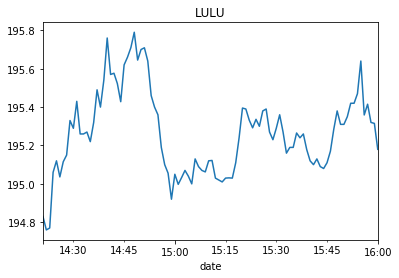

In [32]:
data['1. open'].plot()
plt.title(ticker)
plt.show()

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [36]:
data.to_excel('my_lulu_stock_data.xlsx')